## Deduplication

- The method used for the same was that we first sort the data according to ProductId and then just keep the first similar product review and delelte the others. for eg. in the above just the review for ProductId=B000HDL1RQ remains. This method ensures that there is only one representative for each product and deduplication without sorting would lead to possibility of different representatives still existing for the same product.

#### Pandas Examples

In [ ]:
#Sorting data according to ProductId in ascending order
sorted_data=filtered_data.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

In [ ]:
### Deduplication
#Deduplication of entries
# Drop the rows with Same "UserId","ProfileName","Time","Text"
final=sorted_data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)
final.shape

### How to check what percentage of data is left after removing duplicate values using primary id

In [ ]:
#Checking to see how much % of data still remains
(final['Id'].size*1.0)/(filtered_data['Id'].size*1.0)*100

#### Removing all the values such that col1<col2 condition satisfies (Removing Wrongly filled values)

In [ ]:

final=final[final.HelpfulnessNumerator<=final.HelpfulnessDenominator]

#  Text Preprocessing.

Now that we have finished deduplication our data requires some preprocessing before we go on further with analysis and making the prediction model.

Hence in the Preprocessing phase we do the following in the order below:-

1. Begin by removing the html tags
2. Remove any punctuations or limited set of special characters like , or . or # etc.
3. Check if the word is made up of english letters and is not alpha-numeric
4. Check to see if the length of the word is greater than 2 (as it was researched that there is no adjective in 2-letters)
5. Convert the word to lowercase
6. Remove Stopwords
7. Finally Snowball Stemming the word (it was obsereved to be better than Porter Stemming)<br>

After which we collect the words used to describe positive and negative reviews

## Regular Expressions

In [6]:
import re

In [ ]:
#### Examples
# printing some random reviews
sent_0 = final['Text'].values[0]
print(sent_0)
print("="*50)

sent_1000 = final['Text'].values[1000]
print(sent_1000)
print("="*50)

sent_1500 = final['Text'].values[1500]
print(sent_1500)
print("="*50)

sent_4900 = final['Text'].values[4900]
print(sent_4900)
print("="*50)

### Examples text

- Why is this $[...] when the same product is available for $[...] here?<br />http://www.amazon.com/VICTOR-FLY-MAGNET-BAIT-REFILL/dp/B00004RBDY<br /><br />The Victor M380 and M502 traps are unreal, of course -- total fly genocide. Pretty stinky, but only right nearby.
==================================================
- I recently tried this flavor/brand and was surprised at how delicious these chips are.  The best thing was that there were a lot of "brown" chips in the bsg (my favorite), so I bought some more through amazon and shared with family and friends.  I am a little disappointed that there are not, so far, very many brown chips in these bags, but the flavor is still very good.  I like them better than the yogurt and green onion flavor because they do not seem to be as salty, and the onion flavor is better.  If you haven't eaten Kettle chips before, I recommend that you try a bag before buying bulk.  They are thicker and crunchier than Lays but just as fresh out of the bag.
==================================================
- Wow.  So far, two two-star reviews.  One obviously had no idea what they were ordering; the other wants crispy cookies.  Hey, I'm sorry; but these reviews do nobody any good beyond reminding us to look  before ordering.<br /><br />These are chocolate-oatmeal cookies.  If you don't like that combination, don't order this type of cookie.  I find the combo quite nice, really.  The oatmeal sort of "calms" the rich chocolate flavor and gives the cookie sort of a coconut-type consistency.  Now let's also remember that tastes differ; so, I've given my opinion.<br /><br />Then, these are soft, chewy cookies -- as advertised.  They are not "crispy" cookies, or the blurb would say "crispy," rather than "chewy."  I happen to like raw cookie dough; however, I don't see where these taste like raw cookie dough.  Both are soft, however, so is this the confusion?  And, yes, they stick together.  Soft cookies tend to do that.  They aren't individually wrapped, which would add to the cost.  Oh yeah, chocolate chip cookies tend to be somewhat sweet.<br /><br />So, if you want something hard and crisp, I suggest Nabiso's Ginger Snaps.  If you want a cookie that's soft, chewy and tastes like a combination of chocolate and oatmeal, give these a try.  I'm here to place my second order.
==================================================
- love to order my coffee on amazon.  easy and shows up quickly.<br />This k cup is great coffee.  dcaf is very good as well
==================================================


# a. remove urls from text python: 
- https://stackoverflow.com/a/40823105/4084039

In [74]:

sent_0="Why is this $[...] when the same product is available for $[...] here?<br />http://www.amazon.com/VICTOR-FLY-MAGNET-BAIT-REFILL/dp/B00004RBDY<br /><br />The Victor M380 and M502 traps are unreal, of course -- total fly genocide. Pretty stinky, but only right nearby."
sent_0

'Why is this $[...] when the same product is available for $[...] here?<br />http://www.amazon.com/VICTOR-FLY-MAGNET-BAIT-REFILL/dp/B00004RBDY<br /><br />The Victor M380 and M502 traps are unreal, of course -- total fly genocide. Pretty stinky, but only right nearby.'

- subsitute the selected text with "" using re.sub

In [75]:
sent_0 = re.sub(r"http\S+", "", sent_0)
#sent_1000 = re.sub(r"http\S+", "", sent_1000)
#sent_150 = re.sub(r"http\S+", "", sent_1500)
#sent_4900 = re.sub(r"http\S+", "", sent_4900)

print(sent_0)

Why is this $[...] when the same product is available for $[...] here?<br /> /><br />The Victor M380 and M502 traps are unreal, of course -- total fly genocide. Pretty stinky, but only right nearby.


## b. how-to-remove-all-tags-from-an-element using beautiful soup
#### https://stackoverflow.com/questions/16206380/python-beautifulsoup-how-to-remove-all-tags-from-an-element

In [78]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(sent_0, 'lxml')
sent_0 = soup.get_text()
print(sent_0)
print("="*50)
sent_1500="Hey, I'm sorry; but these reviews do nobody any good beyond reminding us to look  before ordering.<br /><br />These are chocolate-oatmeal cookies.  If you don't like that combination, don't order this type of cookie.  I find the combo quite nice, really."
soup = BeautifulSoup(sent_1500, 'lxml')
sent_1500 = soup.get_text()
print(text)

Why is this $[...] when the same product is available for $[...] here? />The Victor M380 and M502 traps are unreal, of course -- total fly genocide. Pretty stinky, but only right nearby.
Hey, I'm sorry; but these reviews do nobody any good beyond reminding us to look  before ordering.These are chocolate-oatmeal cookies.  If you don't like that combination, don't order this type of cookie.  I find the combo quite nice, really.


### c. Decontracting

In [79]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [80]:
random_text=" I don't like this product. It's not the same as it was shown on the site"
sent_1500="Hey, I'm sorry; but these reviews do nobody any good beyond reminding us to look before ordering.<br /><br />These are chocolate-oatmeal cookies.  If you don't like that combination, don't order this type of cookie.  I find the combo quite nice, really."

In [81]:
random_text = decontracted(random_text)
sent_1500 = decontracted(sent_1500)
sent_0 = decontracted(sent_0)
print(random_text)
print("="*50)
print(sent_1500)


 I do not like this product. It is not the same as it was shown on the site
Hey, I am sorry; but these reviews do nobody any good beyond reminding us to look before ordering.<br /><br />These are chocolate-oatmeal cookies.  If you do not like that combination, do not order this type of cookie.  I find the combo quite nice, really.


### d. remove words with numbers python: https://stackoverflow.com/a/18082370/4084039

In [82]:
sent_0

'Why is this $[...] when the same product is available for $[...] here? />The Victor M380 and M502 traps are unreal, of course -- total fly genocide. Pretty stinky, but only right nearby.'

In [83]:
sent_0 = re.sub("\S*\d\S*", "", sent_0).strip()
print(sent_0)

Why is this $[...] when the same product is available for $[...] here? />The Victor  and  traps are unreal, of course -- total fly genocide. Pretty stinky, but only right nearby.


## e. remove special character: https://stackoverflow.com/a/5843547/4084039
- examples-(. - : ; < > ? , etc.)

#### if a sentence contains both single inverted comma and double inverted comma, use triple quoted string to store the text in string
- https://stackoverflow.com/questions/3657792/inverted-comma-and-string-in-python

In [84]:
example="""This is a long string that can contain single quotations like ' or ".
It can also span multiple lines"""

In [86]:
sent_1500="""Wow.  So far, two two-star reviews.  
One obviously had no idea what they were ordering; the other wants crispy cookies.  Hey, I'm sorry; but these 
reviews do nobody any good beyond reminding us to look  before ordering.<br /><br />These are chocolate-oatmeal
cookies.  If you don't like that combination, don't order this type of cookie. I find the combo quite nice, really.
The oatmeal sort of "calms" the rich" chocolate flavor and gives the cookie sort of a coconut-type consistency.
Now let's also remember that tastes differ; so, I've given my opinion.<br /><br />Then, these are soft, chewy 
cookies -- as advertised.  They are not "crispy" cookies, or the blurb would say ''"crispy,"' rather
than '"chewy."'  I happen to like raw cookie dough; however, I don't see where these taste like raw cookie dough. 
Both are soft, however, so is this the confusion?  And, yes, they stick together.  Soft cookies tend to do that.  
They aren't individually wrapped, which would add to the cost.  Oh yeah, chocolate chip cookies tend to be
somewhat sweet.<br /><br />So, if you want something hard and crisp, I suggest Nabiso's Ginger Snaps.
If you want a cookie that's soft, chewy and tastes like a combination of chocolate and oatmeal, give these a try. 
I'm here to place my second order."""
print(sent_1500)

Wow.  So far, two two-star reviews.  
One obviously had no idea what they were ordering; the other wants crispy cookies.  Hey, I'm sorry; but these 
reviews do nobody any good beyond reminding us to look  before ordering.<br /><br />These are chocolate-oatmeal
cookies.  If you don't like that combination, don't order this type of cookie. I find the combo quite nice, really.
The oatmeal sort of "calms" the rich" chocolate flavor and gives the cookie sort of a coconut-type consistency.
Now let's also remember that tastes differ; so, I've given my opinion.<br /><br />Then, these are soft, chewy 
cookies -- as advertised.  They are not "crispy" cookies, or the blurb would say ''"crispy,"' rather
than '"chewy."'  I happen to like raw cookie dough; however, I don't see where these taste like raw cookie dough. 
Both are soft, however, so is this the confusion?  And, yes, they stick together.  Soft cookies tend to do that.  
They aren't individually wrapped, which would add to the cost.  Oh ye

In [87]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent_1500 = re.sub('[^A-Za-z0-9]+', ' ', sent_1500)
print(sent_1500)

Wow So far two two star reviews One obviously had no idea what they were ordering the other wants crispy cookies Hey I m sorry but these reviews do nobody any good beyond reminding us to look before ordering br br These are chocolate oatmeal cookies If you don t like that combination don t order this type of cookie I find the combo quite nice really The oatmeal sort of calms the rich chocolate flavor and gives the cookie sort of a coconut type consistency Now let s also remember that tastes differ so I ve given my opinion br br Then these are soft chewy cookies as advertised They are not crispy cookies or the blurb would say crispy rather than chewy I happen to like raw cookie dough however I don t see where these taste like raw cookie dough Both are soft however so is this the confusion And yes they stick together Soft cookies tend to do that They aren t individually wrapped which would add to the cost Oh yeah chocolate chip cookies tend to be somewhat sweet br br So if you want somet

### f. Creating our own list of Stop words

In [88]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
# <br /><br /> ==> after the above steps, we are getting "br br"
# we are including them into stop words list
# instead of <br /> if we have <br/> these tags would have revmoved in the 1st step

stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

- removing stop words from the sentences

In [89]:
sent_1500

'Wow So far two two star reviews One obviously had no idea what they were ordering the other wants crispy cookies Hey I m sorry but these reviews do nobody any good beyond reminding us to look before ordering br br These are chocolate oatmeal cookies If you don t like that combination don t order this type of cookie I find the combo quite nice really The oatmeal sort of calms the rich chocolate flavor and gives the cookie sort of a coconut type consistency Now let s also remember that tastes differ so I ve given my opinion br br Then these are soft chewy cookies as advertised They are not crispy cookies or the blurb would say crispy rather than chewy I happen to like raw cookie dough however I don t see where these taste like raw cookie dough Both are soft however so is this the confusion And yes they stick together Soft cookies tend to do that They aren t individually wrapped which would add to the cost Oh yeah chocolate chip cookies tend to be somewhat sweet br br So if you want some

In [91]:
sent_0

'Why is this $[...] when the same product is available for $[...] here? />The Victor  and  traps are unreal, of course -- total fly genocide. Pretty stinky, but only right nearby.'

In [93]:
soup = BeautifulSoup(sent_0, 'lxml')
sent_0 = soup.get_text()
sent_0 = decontracted(sent_0)
sent_0 = re.sub("\S*\d\S*", "", sent_0).strip()
sent_0 = re.sub('[^A-Za-z]+', ' ', sent_0)
sent_0

'Why is this when the same product is available for here The Victor and traps are unreal of course total fly genocide Pretty stinky but only right nearby '

In [94]:
sentance1 = ' '.join(e.lower() for e in sent_1500.split() if e.lower() not in stopwords)
sentance2 = ' '.join(e.lower() for e in sent_0.split() if e.lower() not in stopwords)
sentance1

'wow far two two star reviews one obviously no idea ordering wants crispy cookies hey sorry reviews nobody good beyond reminding us look ordering chocolate oatmeal cookies like combination order type cookie find combo quite nice really oatmeal sort calms rich chocolate flavor gives cookie sort coconut type consistency let also remember tastes differ given opinion soft chewy cookies advertised not crispy cookies blurb would say crispy rather chewy happen like raw cookie dough however see taste like raw cookie dough soft however confusion yes stick together soft cookies tend individually wrapped would add cost oh yeah chocolate chip cookies tend somewhat sweet want something hard crisp suggest nabiso ginger snaps want cookie soft chewy tastes like combination chocolate oatmeal give try place second order'

In [95]:
sentance2

'product available victor traps unreal course total fly genocide pretty stinky right nearby'

## G. Text preprocessing order is important
### Combining all the above stundents 

In [ ]:

from tqdm import tqdm
preprocessed_reviews = []
# tqdm is for printing the status bar
for sentance in tqdm(final['Text'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_reviews.append(sentance.strip())

In [60]:

from sklearn.feature_extraction.text import CountVectorizer


In [58]:
### Featurizations

## [4.1] BAG OF WORDS

In [96]:
#BoW
preprocessed_reviews = [sentance1,sentance2]
count_vect = CountVectorizer() #in scikit-learn
count_vect.fit(preprocessed_reviews)


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [97]:
print("some feature names ", count_vect.get_feature_names()[:10])
print('='*50)



some feature names  ['add', 'advertised', 'also', 'available', 'beyond', 'blurb', 'calms', 'chewy', 'chip', 'chocolate']


In [98]:
final_counts = count_vect.transform(preprocessed_reviews)
print("the type of count vectorizer ",type(final_counts))
print("the shape of out text BOW vectorizer ",final_counts.get_shape())
print("the number of unique words ", final_counts.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (2, 100)
the number of unique words  100


## [4.2] Bi-Grams and n-Grams.

In [102]:
#bi-gram, tri-gram and n-gram

#removing stop words like "not" should be avoided before building n-grams
# count_vect = CountVectorizer(ngram_range=(1,2))
# please do read the CountVectorizer documentation http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
# you can choose these numebrs min_df=10, max_features=5000, of your choice
count_vect = CountVectorizer(ngram_range=(1,2), max_features=100)
final_bigram_counts = count_vect.fit_transform(preprocessed_reviews)
print("the type of count vectorizer ",type(final_bigram_counts))
print("the shape of out text BOW vectorizer ",final_bigram_counts.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_bigram_counts.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (2, 100)
the number of unique words including both unigrams and bigrams  100


In [103]:
print("some feature names ", count_vect.get_feature_names()[:10])
print('='*50)



some feature names  ['add', 'chewy', 'chocolate', 'chocolate oatmeal', 'combination', 'cookie', 'cookie dough', 'cookies', 'cookies tend', 'crispy']


In [104]:
count_vect.get_feature_names()

['add',
 'chewy',
 'chocolate',
 'chocolate oatmeal',
 'combination',
 'cookie',
 'cookie dough',
 'cookies',
 'cookies tend',
 'crispy',
 'crispy cookies',
 'dough',
 'however',
 'like',
 'like combination',
 'like raw',
 'oatmeal',
 'order',
 'order type',
 'ordering',
 'ordering chocolate',
 'ordering wants',
 'place',
 'place second',
 'pretty',
 'pretty stinky',
 'product',
 'product available',
 'quite',
 'quite nice',
 'rather',
 'rather chewy',
 'raw',
 'raw cookie',
 'really',
 'really oatmeal',
 'remember',
 'remember tastes',
 'reminding',
 'reminding us',
 'reviews',
 'reviews nobody',
 'reviews one',
 'rich',
 'rich chocolate',
 'right',
 'right nearby',
 'say',
 'say crispy',
 'second',
 'second order',
 'see',
 'see taste',
 'snaps',
 'snaps want',
 'soft',
 'soft chewy',
 'soft cookies',
 'soft however',
 'something',
 'something hard',
 'somewhat',
 'somewhat sweet',
 'sorry',
 'sorry reviews',
 'sort',
 'sort calms',
 'sort coconut',
 'stick together',
 'tastes',
 'te

## [4.3] TF-IDF

In [106]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

In [107]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
tf_idf_vect.fit(preprocessed_reviews)
print("some sample features(unique words in the corpus)",tf_idf_vect.get_feature_names()[0:10])
print('='*50)

final_tf_idf = tf_idf_vect.transform(preprocessed_reviews)
print("the type of count vectorizer ",type(final_tf_idf))
print("the shape of out text TFIDF vectorizer ",final_tf_idf.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_tf_idf.get_shape()[1])

some sample features(unique words in the corpus) ['add', 'add cost', 'advertised', 'advertised not', 'also', 'also remember', 'available', 'available victor', 'beyond', 'beyond reminding']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (2, 228)
the number of unique words including both unigrams and bigrams  228


## [4.4] Word2Vec

In [114]:
pip install gensim

     |████████████████████████████████| 24.2MB 1.6MB/s eta 0:00:01    |████████▋                       | 6.5MB 1.8MB/s eta 0:00:11
     |████████████████████████████████| 122kB 1.4MB/s eta 0:00:01
     |████████████████████████████████| 133kB 2.0MB/s eta 0:00:01
     |████████████████████████████████| 71kB 1.5MB/s eta 0:00:01
     |████████████████████████████████| 6.3MB 514kB/s eta 0:00:01
  Created wheel for smart-open: filename=smart_open-2.1.0-cp37-none-any.whl size=110321 sha256=09440126d1c47881dc36b7d09954509eb5a60449c1cedcb517e4c538c902e01b
  Stored in directory: /Users/amimalli/Library/Caches/pip/wheels/25/6c/db/7dcb26f19fb260c5629af85ed1c8ef9641143444fc7ec1fa08
Successfully built smart-open
Note: you may need to restart the kernel to use updated packages.


In [115]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

In [108]:
# Train your own Word2Vec model using your own text corpus
i=0
list_of_sentance=[]
for sentance in preprocessed_reviews:
    list_of_sentance.append(sentance.split())

In [112]:
len(list_of_sentance[1])

13

In [117]:
list_of_sentance

[['wow',
  'far',
  'two',
  'two',
  'star',
  'reviews',
  'one',
  'obviously',
  'no',
  'idea',
  'ordering',
  'wants',
  'crispy',
  'cookies',
  'hey',
  'sorry',
  'reviews',
  'nobody',
  'good',
  'beyond',
  'reminding',
  'us',
  'look',
  'ordering',
  'chocolate',
  'oatmeal',
  'cookies',
  'like',
  'combination',
  'order',
  'type',
  'cookie',
  'find',
  'combo',
  'quite',
  'nice',
  'really',
  'oatmeal',
  'sort',
  'calms',
  'rich',
  'chocolate',
  'flavor',
  'gives',
  'cookie',
  'sort',
  'coconut',
  'type',
  'consistency',
  'let',
  'also',
  'remember',
  'tastes',
  'differ',
  'given',
  'opinion',
  'soft',
  'chewy',
  'cookies',
  'advertised',
  'not',
  'crispy',
  'cookies',
  'blurb',
  'would',
  'say',
  'crispy',
  'rather',
  'chewy',
  'happen',
  'like',
  'raw',
  'cookie',
  'dough',
  'however',
  'see',
  'taste',
  'like',
  'raw',
  'cookie',
  'dough',
  'soft',
  'however',
  'confusion',
  'yes',
  'stick',
  'together',
  's

In [116]:
 w2v_model=Word2Vec(list_of_sentance,min_count=5,size=50, workers=4)
 

In [123]:
len(w2v_model.wv.vocab)

2

In [132]:
w2v_words=list(w2v_model.wv.vocab)

In [125]:
print(w2v_model.wv.most_similar('cookies'))
print('='*50)
    

[('cookie', 0.23616144061088562)]


In [129]:
from tqdm import tqdm
import numpy as np

In [133]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentance): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

100%|██████████| 2/2 [00:00<00:00, 3215.26it/s]

2
50


In [134]:
sent_vectors

[array([-0.00810106, -0.00847071, -0.00329941,  0.0066232 , -0.00533509,
         0.00228551,  0.00030322, -0.00594147,  0.00123055,  0.0039266 ,
         0.00439999,  0.00201222,  0.00364573, -0.00360967, -0.00597669,
        -0.00021666, -0.00444218,  0.00598058,  0.00194283,  0.00300569,
         0.00649335, -0.00549685, -0.00076663,  0.00320739,  0.00021545,
        -0.00088836, -0.0076554 ,  0.00782166, -0.00228824, -0.00086885,
         0.00091113,  0.0063871 , -0.00562991,  0.00055852,  0.00187097,
         0.00640708, -0.00330688, -0.00325181,  0.00765836, -0.00129318,
        -0.00358998,  0.00220201,  0.0012354 , -0.00280947,  0.00195996,
         0.00414108,  0.0036179 ,  0.00041414,  0.0026658 , -0.00102802]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])]

In [135]:
#### [4.4.1.2] TFIDF weighted W2v

In [136]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
model = TfidfVectorizer()
model.fit(preprocessed_reviews)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))

In [137]:
dictionary

{'add': 1.4054651081081644,
 'advertised': 1.4054651081081644,
 'also': 1.4054651081081644,
 'available': 1.4054651081081644,
 'beyond': 1.4054651081081644,
 'blurb': 1.4054651081081644,
 'calms': 1.4054651081081644,
 'chewy': 1.4054651081081644,
 'chip': 1.4054651081081644,
 'chocolate': 1.4054651081081644,
 'coconut': 1.4054651081081644,
 'combination': 1.4054651081081644,
 'combo': 1.4054651081081644,
 'confusion': 1.4054651081081644,
 'consistency': 1.4054651081081644,
 'cookie': 1.4054651081081644,
 'cookies': 1.4054651081081644,
 'cost': 1.4054651081081644,
 'course': 1.4054651081081644,
 'crisp': 1.4054651081081644,
 'crispy': 1.4054651081081644,
 'differ': 1.4054651081081644,
 'dough': 1.4054651081081644,
 'far': 1.4054651081081644,
 'find': 1.4054651081081644,
 'flavor': 1.4054651081081644,
 'fly': 1.4054651081081644,
 'genocide': 1.4054651081081644,
 'ginger': 1.4054651081081644,
 'give': 1.4054651081081644,
 'given': 1.4054651081081644,
 'gives': 1.4054651081081644,
 'good':

In [138]:
# TF-IDF weighted Word2Vec
tfidf_feat = model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sentance): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words and word in tfidf_feat:
            vec = w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

100%|██████████| 2/2 [00:00<00:00, 4683.76it/s]


In [139]:
tfidf_sent_vectors

[array([-0.00813555, -0.00859994, -0.00352879,  0.00683855, -0.00566   ,
         0.00228679, -0.00048478, -0.0060954 ,  0.00119323,  0.00356258,
         0.00403382,  0.00159128,  0.00332742, -0.00347812, -0.0057759 ,
         0.00051414, -0.00459087,  0.0057954 ,  0.00180788,  0.00270402,
         0.00630671, -0.00551613, -0.00101702,  0.00274534,  0.00027432,
        -0.00060325, -0.00772635,  0.00785342, -0.00203148, -0.00081584,
         0.00143149,  0.00612393, -0.00590577,  0.00128794,  0.00137229,
         0.00649312, -0.00345271, -0.00325914,  0.00753021, -0.0006844 ,
        -0.00356692,  0.00191503,  0.00137961, -0.00298043,  0.00198601,
         0.00397522,  0.00358781,  0.00062178,  0.00280425, -0.00064323]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])]

In [140]:
# [5] Applying TSNE

<ol> 
    <li> you need to plot 4 tsne plots with each of these feature set
        <ol>
            <li>Review text, preprocessed one converted into vectors using (BOW)</li>
            <li>Review text, preprocessed one converted into vectors using (TFIDF)</li>
            <li>Review text, preprocessed one converted into vectors using (AVG W2v)</li>
            <li>Review text, preprocessed one converted into vectors using (TFIDF W2v)</li>
        </ol>
    </li>
    <li> <font color='blue'>Note 1: The TSNE accepts only dense matrices</font></li>
    <li> <font color='blue'>Note 2: Consider only 5k to 6k data points </font></li>
</ol>

In [142]:
# https://github.com/pavlin-policar/fastTSNE you can try this also, this version is little faster than sklearn 
import numpy as np
from sklearn.manifold import TSNE
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

iris = datasets.load_iris()
x = iris['data']
y = iris['target']



In [146]:
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)

X_embedding = tsne.fit_transform(x)


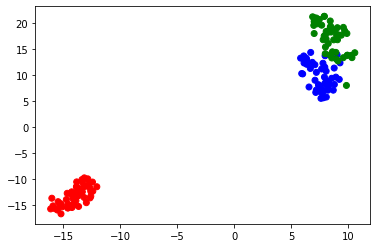

In [147]:
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix

for_tsne = np.hstack((X_embedding, y.reshape(-1,1)))
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])
colors = {0:'red', 1:'blue', 2:'green'}
plt.scatter(for_tsne_df['Dimension_x'], for_tsne_df['Dimension_y'], c=for_tsne_df['Score'].apply(lambda x: colors[x]))
plt.show()

In [152]:
## [5.1] Applying TNSE on Text BOW vectors
final_counts=final_counts.toarray()

In [153]:
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)

X_embedding = tsne.fit_transform(final_counts)



In [156]:
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix

for_tsne = np.hstack((X_embedding, y.reshape(-1,1)))
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])
colors = {0:'red', 1:'blue', 2:'green'}
plt.scatter(for_tsne_df['Dimension_x'], for_tsne_df['Dimension_y'], c=for_tsne_df['Score'].apply(lambda x: colors[x]))
plt.show()

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 2 and the array at index 1 has size 150